In [16]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [17]:
src = ceo.Source('R',rays_box_size=25.5,rays_box_sampling=129,rays_origin=[0,0,25])
gmt = ceo.GMT_MX()

In [18]:
src.reset()
gmt.propagate(src)

In [19]:
img = ceo.Imaging()

-0.029958908 3.0181546


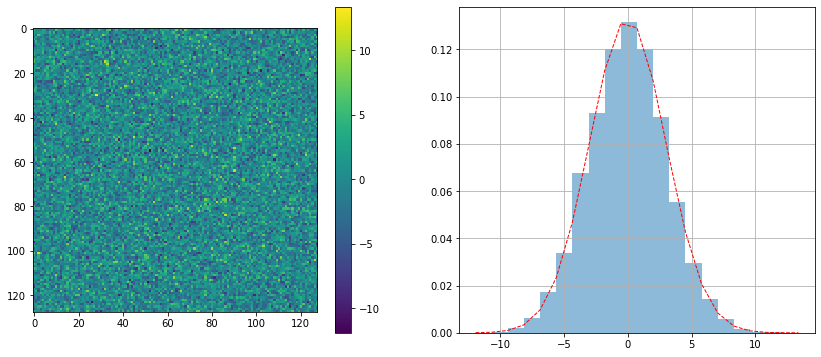

In [32]:
img.reset()
ron = 3
img.readOut(1.,ron)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

print(np.mean(img.frame.host_data), np.std(img.frame.host_data))

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, density=True, alpha=0.5)
    y = norm.pdf( bins, 0, ron)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)

In [23]:
src.nBackgroundPhoton(10)*img.pixelScaleArcsec(src)**2

2536.682045225284

In [24]:
img.pixelScaleArcsec(src)

0.0025884210966403472

2536.682045225284
2536.8892 2521.0134


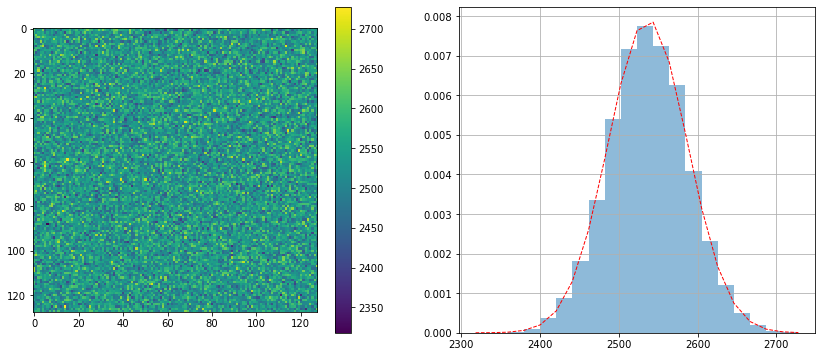

In [34]:
img.reset()
nB = src.nBackgroundPhoton(10)*img.pixelScaleArcsec(src)**2 # # of mean photon per pixel
img.readOut(1.,0,nB)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

print(nB)
print(np.mean(img.frame.host_data), np.var(img.frame.host_data))

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, density=True, alpha=0.5)
    y = norm.pdf( bins, nB, s)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)